In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
pd.set_option('display.max_columns', None)

In [127]:
df = pd.read_csv("gurgaon_10kk_After_multivariant_cleaned_Fvinal_v1.csv").drop_duplicates()

In [84]:
df.shape

(10032, 34)

In [85]:
df.head(3)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM
0,70480214,j70480214,gurgaon,5500.0,15.0,350.0,3.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,Unfurnished,5,0-1 Year Old Property,high rise,1.0,signature global solera 2,2.0,28.512525,76.973543,1.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,86,1,1,2.0
1,70794112,u70794112,gurgaon,7000.0,10.0,700.0,15.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,1.0,rof ananda,1.0,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,218,2,0,0,0,0,7,63,1,2,7.0
2,70607360,o70607360,gurgaon,7500.0,14.0,514.0,3.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,Unfurnished,5,5-10 Year Old Property,high rise,2.0,signature global solera 2,1.0,28.512525,76.973543,2.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,76,1,2,6.0


In [6]:
outlier_columns=["PRICE","AREA","TOTAL_LANDMARK_COUNT","BEDROOM_NUMBEDROOM_NUM","BEDROOM_NUM","BALCONY_NUM","AMENITIES_SCORE","FLOOR_NUM"]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\2574372507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

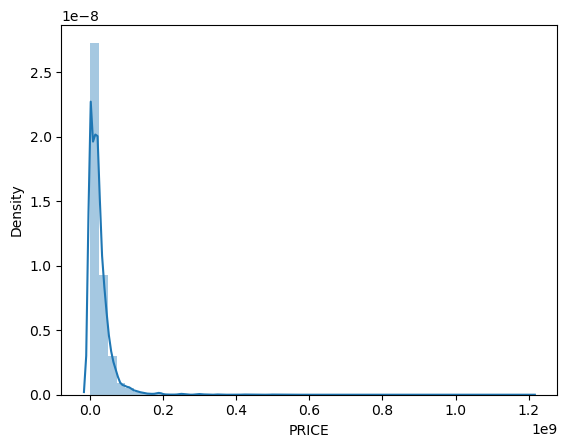

In [7]:
# outliers on the basis of price column
sns.distplot(df['PRICE'])

<Axes: xlabel='PRICE'>

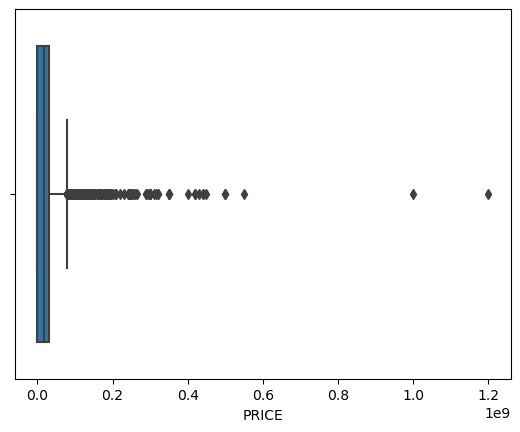

In [8]:
sns.boxplot(x=df['PRICE'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['PRICE'].describe()

num_outliers, outliers_price_stats

(415,
 count    4.150000e+02
 mean     1.396145e+08
 std      1.001318e+08
 min      8.000000e+07
 25%      9.250000e+07
 50%      1.080000e+08
 75%      1.427500e+08
 max      1.200000e+09
 Name: PRICE, dtype: float64)

In [15]:
outliers.sort_values('PRICE',ascending=False).head(20)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM
10220,69963388,x69963388,gurgaon,1.200000e+09,843288.0,1423.0,9.0,3 bhk independent builder floor in sector 89 g...,the newly constructed low rise floors with com...,independent/builder floor,Semifurnished,3,1-5 Year Old Property,mid rise,3.0,m3m soulitude,2.0,28.417059,76.952417,3.0,sector 89 gurgaon,m3m soulitude,m3m soulitude,NaN,1,0,1,2,1,3,70,1,2,3.0
10219,70231990,t70231990,gurgaon,1.000000e+09,160000000.0,272250.0,6.0,residential land / plot in sector 78 gurgaon,available for sale 6.25 acres rate of 16cr per...,residential land,not available,3,0-1 Year Old Property,mid rise,NaN,"shikopur village sector 78, gurgaon",NaN,28.373276,76.972947,78.0,sector 78 gurgaon,"shikopur village sector 78, gurgaon","shikopur village sector 78, gurgaon",1.25 acres and 6.25acres land,0,0,0,0,0,3,24,1,0,NaN
10217,70877280,b70877280,gurgaon,5.000000e+08,67851.0,7369.0,15.0,4 bhk flat in sector 42 gurgaon,luxury deals by expert \n\n7400 sq ft exclusiv...,residential apartment,not available,1,1-5 Year Old Property,high rise,4.0,dlf the camellias,3.0,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,110,1,1,18.0
10216,70270684,f70270684,gurgaon,5.000000e+08,67567.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,dlf the camellias is one of the most popular d...,residential apartment,Furnished,3,0-1 Year Old Property,high rise,4.0,dlf the camellias,4.0,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,138,1,3,7.0
10215,21691299,q21691299,gurgaon,4.500000e+08,49046.0,9175.0,15.0,5 bhk flat in sector 42 gurgaon,"duplex house, corner unit is available at high...",residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,5.0,dlf the magnolias,4.0,28.453820,77.099560,5.0,sector 42 gurgaon,dlf the magnolias,dlf the magnolias,dlf phase-5. near rapid metro station,2,2,0,3,2,1,126,1,3,11.0
10214,67171316,p67171316,gurgaon,4.400000e+08,67692.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,dlf the cemallias \n\n7400 sq.ft ultra luxury ...,residential apartment,Semifurnished,0,5-10 Year Old Property,high rise,4.0,dlf the camellias,2.0,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,333,2,2,1,2,1,1,107,1,1,9.0
10213,70006602,j70006602,gurgaon,4.400000e+08,59459.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,check out this 4 bhk apartment for sale in dlf...,residential apartment,Semifurnished,0,5-10 Year Old Property,high rise,4.0,dlf the camellias,4.0,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,0,1,0,14.0
10212,70365666,e70365666,gurgaon,4.300000e+08,420743.0,9198.0,46.0,9 bedroom house in dlf phase 1,avl for sale 1022 yards luxurious kothi prime ...,independent house/villa,Semifurnished,5,0-1 Year Old Property,low rise,9.0,NaN,4.0,28.475491,77.103210,9.0,dlf phase 1,NaN,NaN,NaN,6,1,0,0,21,1,51,0,2,NaN
10211,68650922,s68650922,gurgaon,4.200000e+08,60008.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,looking for a 4 bhk property for sale in gurga...,residential apartment,Semifurnished,5,5-10 Year Old Property,high rise,4.0,dlf the camellias,4.0,28.454897,77.105367,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,a 210,2,2,1,2,1,1,141,1,3,10.0
10210,70664754,n70664754,gurgaon,4.200000e+08,130000.0,3000.0,15.0,residential land / plot in sector 83 gurgaon,vatika plot location good\nproperty near park ...,residential land,not available,5,0-1 Year Old Property,mid rise,NaN,vatika india next plots,NaN,28.390392,76.969340,83.0,sector 83 gurgaon,vatika india next plots,vatika india next plots,1236,0,1,1,2,5,1,24,1,0,NaN


In [16]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

## PRICE_SQFT

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\1849391936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE_SQFT'])


<Axes: xlabel='PRICE_SQFT', ylabel='Density'>

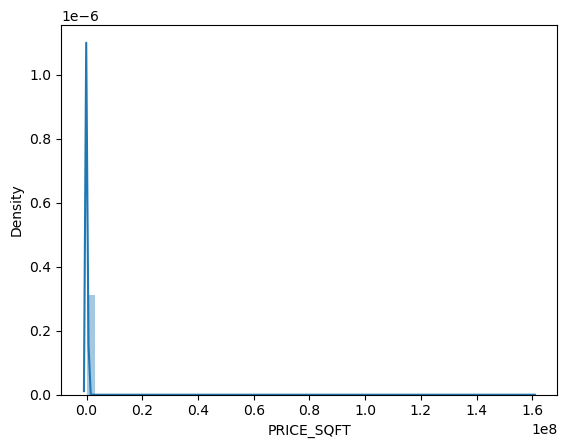

In [17]:
sns.distplot(df['PRICE_SQFT'])

<Axes: xlabel='PRICE_SQFT'>

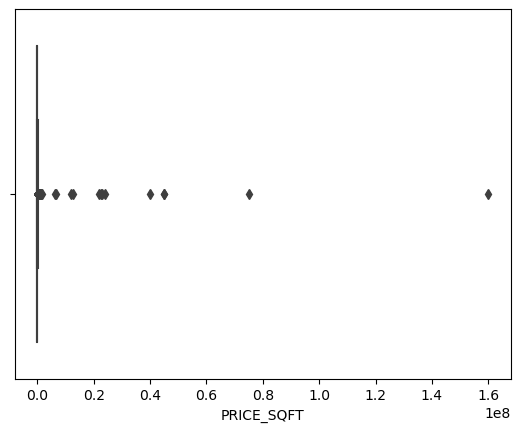

In [13]:
sns.boxplot(x=df['PRICE_SQFT'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['PRICE_SQFT'].quantile(0.25)
Q3 = df['PRICE_SQFT'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['PRICE_SQFT'] < lower_bound) | (df['PRICE_SQFT'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['PRICE_SQFT'].describe()

num_outliers, outliers_price_stats

(1887,
 count    1.887000e+03
 mean     4.127077e+05
 std      4.552788e+06
 min      4.430500e+04
 25%      9.500000e+04
 50%      1.276590e+05
 75%      1.934580e+05
 max      1.600000e+08
 Name: PRICE_SQFT, dtype: float64)

In [30]:
rent_temp = rent_temp = pd.concat([df[df["DESCRIPTION"].str.contains(" rent ") & (df["PRICE"] > 5000)]],ignore_index=True,)
print(rent_temp)
rent_temp.head()
     


          SPID    PROP_ID     CITY       PRICE  PRICE_SQFT    AREA  \
0     70794112  u70794112  gurgaon      7000.0        10.0   700.0   
1     70607360  o70607360  gurgaon      7500.0        14.0   514.0   
2     70794132  f70794132  gurgaon      8500.0         9.0   910.0   
3     69621256  s69621256  gurgaon      8500.0         8.0   980.0   
4     69980156  p69980156  gurgaon      8500.0        23.0   366.0   
...        ...        ...      ...         ...         ...     ...   
1806  48287723  z48287723  gurgaon  70000000.0     12068.0  5800.0   
1807  33420069  p33420069  gurgaon  85000000.0      9493.0  7900.0   
1808   6363765   d6363765  gurgaon  90000000.0     15384.0  5200.0   
1809  69895362  r69895362  gurgaon  95000000.0    211111.0   450.0   
1810  70092106  f70092106  gurgaon  95000000.0    251322.0  3402.0   

      TOTAL_LANDMARK_COUNT                                     PROP_HEADING  \
0                     15.0                  1 bhk flat in sector 95 gurgaon   
1

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM
0,70794112,u70794112,gurgaon,7000.0,10.0,700.0,15.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,1.0,rof ananda,1.0,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,218,2,0,0,0,0,7,63,1,2,7.0
1,70607360,o70607360,gurgaon,7500.0,14.0,514.0,3.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,Unfurnished,5,5-10 Year Old Property,high rise,2.0,signature global solera 2,1.0,28.512525,76.973543,2.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,76,1,2,6.0
2,70794132,f70794132,gurgaon,8500.0,9.0,910.0,15.0,2 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,2.0,rof ananda,1.0,28.484814,77.080853,2.0,sector 95 gurgaon,rof ananda,rof ananda,619,2,0,0,0,0,7,64,1,2,6.0
3,69621256,s69621256,gurgaon,8500.0,8.0,980.0,3.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,Unfurnished,1,0-1 Year Old Property,high rise,2.0,ramsons kshitij,1.0,28.416679,76.902677,2.0,sector 95 gurgaon,ramsons kshitij,ramsons kshitij,NaN,0,0,0,0,3,0,99,1,1,7.0
4,69980156,p69980156,gurgaon,8500.0,23.0,366.0,15.0,1 bhk flat in sector 95 gurgaon,this 1 bhk flat in sector 95 gurgaon is availa...,residential apartment,Semifurnished,8,0-1 Year Old Property,high rise,1.0,rof ananda,1.0,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,302,2,0,0,0,0,7,72,1,2,5.0


In [27]:
df[df["DESCRIPTION"].str.contains(" rent ") & df['PRICE']<25000]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM
0,70480214,j70480214,gurgaon,5.500000e+03,15.0,350.0,3.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,Unfurnished,5,0-1 Year Old Property,high rise,1.0,signature global solera 2,2.0,28.512525,76.973543,1.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,86,1,1,2.0
1,70794112,u70794112,gurgaon,7.000000e+03,10.0,700.0,15.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,1.0,rof ananda,1.0,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,218,2,0,0,0,0,7,63,1,2,7.0
2,70607360,o70607360,gurgaon,7.500000e+03,14.0,514.0,3.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,Unfurnished,5,5-10 Year Old Property,high rise,2.0,signature global solera 2,1.0,28.512525,76.973543,2.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,76,1,2,6.0
3,70794132,f70794132,gurgaon,8.500000e+03,9.0,910.0,15.0,2 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,2.0,rof ananda,1.0,28.484814,77.080853,2.0,sector 95 gurgaon,rof ananda,rof ananda,619,2,0,0,0,0,7,64,1,2,6.0
4,69621256,s69621256,gurgaon,8.500000e+03,8.0,980.0,3.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,Unfurnished,1,0-1 Year Old Property,high rise,2.0,ramsons kshitij,1.0,28.416679,76.902677,2.0,sector 95 gurgaon,ramsons kshitij,ramsons kshitij,NaN,0,0,0,0,3,0,99,1,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10216,70270684,f70270684,gurgaon,5.000000e+08,67567.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,dlf the camellias is one of the most popular d...,residential apartment,Furnished,3,0-1 Year Old Property,high rise,4.0,dlf the camellias,4.0,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,138,1,3,7.0
10217,70877280,b70877280,gurgaon,5.000000e+08,67851.0,7369.0,15.0,4 bhk flat in sector 42 gurgaon,luxury deals by expert \n\n7400 sq ft exclusiv...,residential apartment,not available,1,1-5 Year Old Property,high rise,4.0,dlf the camellias,3.0,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,110,1,1,18.0
10218,23798278,g23798278,gurgaon,5.500000e+08,43478.0,11500.0,15.0,5 bhk flat in sector 42 gurgaon,"for sale - penthouse, in dlf - the magnolias, ...",residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,5.0,dlf the magnolias,4.0,28.453820,77.099560,5.0,sector 42 gurgaon,dlf the magnolias,dlf the magnolias,"for sale - penthouse at dlf the magnolias, sec...",2,2,0,3,2,1,127,1,3,25.0
10219,70231990,t70231990,gurgaon,1.000000e+09,160000000.0,272250.0,6.0,residential land / plot in sector 78 gurgaon,available for sale 6.25 acres rate of 16cr per...,residential land,not available,3,0-1 Year Old Property,mid rise,NaN,"shikopur village sector 78, gurgaon",NaN,28.373276,76.972947,78.0,sector 78 gurgaon,"shikopur village sector 78, gurgaon","shikopur village sector 78, gurgaon",1.25 acres and 6.25acres land,0,0,0,0,0,3,24,1,0,NaN


In [19]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'LATITUDE', 'LOGNITUDE', 'BHK_BED', 'LOCALITY_NAME',
       'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS', 'TRNSPORTATION',
       'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH', 'OTHER',
       'AMENITIES_SCORE', 'LANDMARKS_CLUSTER', 'LANDMARKS_N_SCORES_CLUSTER',
       'FLOOR_NUM'],
      dtype='object')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\1863738208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AREA'])


<Axes: xlabel='AREA', ylabel='Density'>

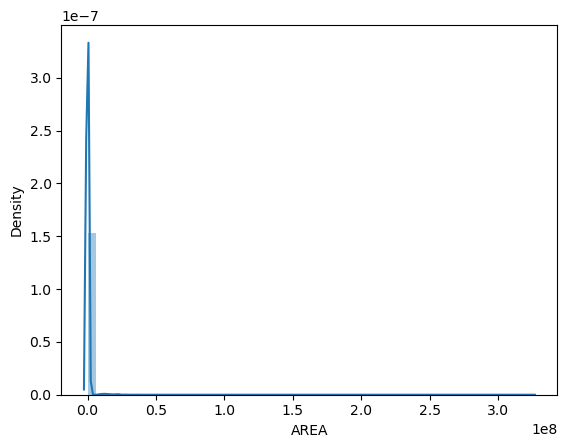

In [22]:
sns.distplot(df['AREA'])

<Axes: xlabel='AREA'>

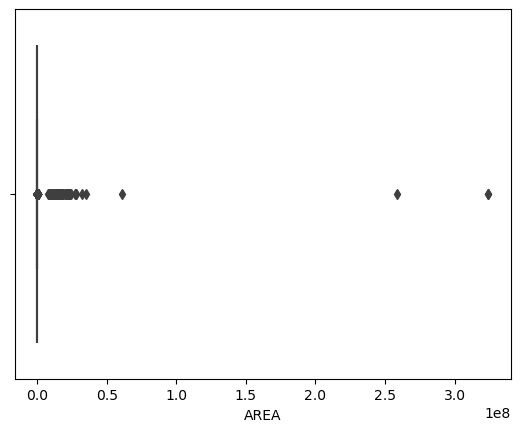

In [23]:
sns.boxplot(x=df['AREA'])

In [25]:
df['AREA'].describe()

count    1.003200e+04
mean     2.482769e+05
std      5.530157e+06
min      3.000000e+01
25%      1.600000e+03
50%      2.092000e+03
75%      2.719250e+03
max      3.243126e+08
Name: AREA, dtype: float64

In [49]:
df[df['AREA'] > 100000]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM


In [50]:
##df = df[(df['AREA'] < 100000) & df['DESCRIPTION'].str.contains('rent')]

In [87]:
df = df[df['AREA'] < 100000]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\1863738208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AREA'])


<Axes: xlabel='AREA', ylabel='Density'>

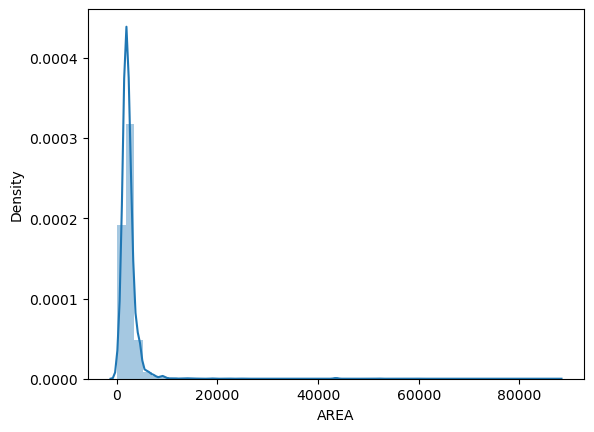

In [88]:
sns.distplot(df['AREA'])

<Axes: xlabel='AREA'>

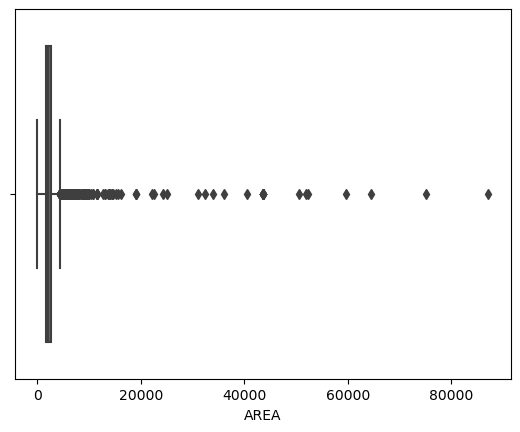

In [89]:
sns.boxplot(x=df['AREA'])

In [93]:
(df['AREA'] < 100000) & df['DESCRIPTION'].str.contains('rent').shape

0        True
1        True
2        True
3        True
4        True
         ... 
10215    True
10216    True
10217    True
10218    True
10220    True
Name: AREA, Length: 9918, dtype: bool

In [90]:
df[df['AREA'] > 10000].sort_values('AREA',ascending=False)

#295 ,87 ,33 ,10116 ,5060,3889 , 2860 , 295 ,3889,2682 ,2514

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM
9792,70006550,m70006550,gurgaon,80000000.0,40000000.0,87120.0,2.0,residential land / plot in sohna,its feels like hill station surrounded by hill...,residential land,not available,5,0-1 Year Old Property,low rise,NaN,NaN,NaN,28.249352,77.067276,NaN,sohna,NaN,NaN,NaN,0,0,0,0,2,0,18,1,0,NaN
2860,70500486,p70500486,gurgaon,4200000.0,7167.0,75000.0,15.0,2 bhk flat in sector 37d gurgaon,"situated in sector 37d gurgaon, signature glob...",residential apartment,Unfurnished,3,5-10 Year Old Property,high rise,2.0,signature global the millennia,3.0,28.445865,76.979212,2.0,sector 37d gurgaon,signature global the millennia,signature global the millennia,506,2,0,0,2,2,7,90,1,1,4.0
295,70124072,w70124072,gurgaon,26000.0,0.0,64451.0,15.0,2 bhk flat in sector 37d gurgaon,find this 2 bhk apartment for rent in sector 3...,residential apartment,Semifurnished,5,5-10 Year Old Property,high rise,2.0,signature global the millennia,2.0,28.444091,76.967096,2.0,sector 37d gurgaon,signature global the millennia,signature global the millennia,NaN,2,0,0,2,2,7,49,1,2,10.0
87,70769006,t70769006,gurgaon,17000.0,0.0,59612.0,10.0,2 bhk flat in sector 37d gurgaon,ready to move property for rent,residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,2.0,signature global the millennia,3.0,28.444091,76.967096,2.0,sector 37d gurgaon,signature global the millennia,signature global the millennia,NaN,2,1,1,1,1,1,55,1,2,13.0
5816,70390086,c70390086,gurgaon,20000000.0,6666667.0,52271.0,NaN,residential land / plot in sohna,planning to build residence in haryana others?...,residential land,not available,5,0-1 Year Old Property,low rise,NaN,vatika westin sohna resort,NaN,28.237599,77.149407,NaN,sohna,vatika westin sohna resort,vatika westin sohna resort,NaN,0,0,0,0,0,0,24,1,0,NaN
33,71017380,j71017380,gurgaon,14000.0,0.0,51922.0,10.0,2 bhk flat in sector 37d gurgaon,explore this amicable signature global the mil...,residential apartment,Unfurnished,6,5-10 Year Old Property,high rise,2.0,signature global the millennia,3.0,28.444091,76.967096,2.0,sector 37d gurgaon,signature global the millennia,signature global the millennia,NaN,2,1,1,1,1,1,55,1,2,6.0
9263,70096892,p70096892,gurgaon,55000000.0,11316.0,50580.0,47.0,8 bedroom house in mayfield garden,240sqyd 8bhk servant room ultra luxury kothi p...,independent house/villa,Semifurnished,5,0-1 Year Old Property,low rise,8.0,NaN,2.0,28.424140,77.061480,8.0,mayfield garden,NaN,NaN,12356,0,1,1,0,16,1,51,0,2,NaN
3870,70190906,e70190906,gurgaon,12500000.0,12500000.0,43560.0,NaN,residential land / plot in sohna palwal road,"agriculture land on sohna palwal road, khalilp...",residential land,not available,3,0-1 Year Old Property,low rise,NaN,NaN,NaN,77.026640,28.459500,NaN,sohna palwal road,NaN,NaN,0005,0,0,0,0,0,0,5,1,0,NaN
9753,70191148,v70191148,gurgaon,75000000.0,75000000.0,43560.0,NaN,residential land / plot in sohna palwal road,"agriculture land on sohna road nean bhondsi, m...",residential land,not available,3,0-1 Year Old Property,low rise,NaN,NaN,NaN,77.026640,28.459500,NaN,sohna palwal road,NaN,NaN,0006,0,0,0,0,0,0,5,1,0,NaN
8798,70190704,z70190704,gurgaon,45000000.0,45000000.0,43560.0,NaN,residential land / plot in sohna road bhondsi ...,"agriculture land on sohna road near bhondsi , ...",residential land,not available,3,0-1 Year Old Property,low rise,NaN,NaN,NaN,77.026640,28.459500,NaN,"sohna road bhondsi , maruti kunj",NaN,NaN,0004,0,0,0,0,0,0,5,1,0,NaN


In [94]:
df.drop(index=[295 ,87 ,33 ,10116 ,5060,3889 , 2860 , 295 ,3889,2682 ,2514], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\2266519803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df['AREA'])


<Axes: ylabel='Density'>

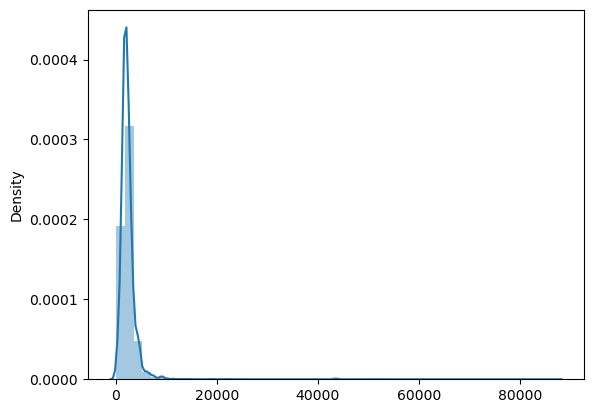

In [95]:
sns.distplot(x =df['AREA'])

<Axes: xlabel='AREA'>

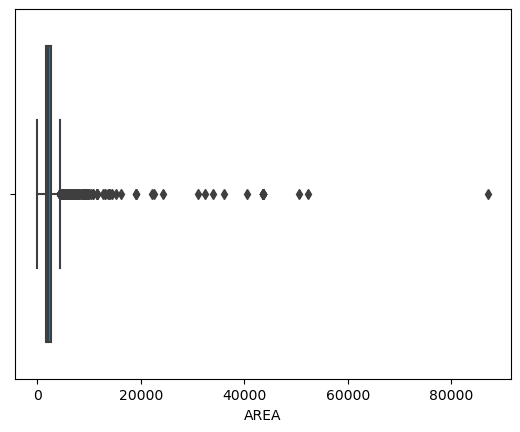

In [96]:
sns.boxplot(x =df['AREA'])

In [97]:
df['AREA'].describe()

count     9909.000000
mean      2395.621455
std       2251.877277
min         30.000000
25%       1600.000000
50%       2073.000000
75%       2700.000000
max      87120.000000
Name: AREA, dtype: float64

In [128]:
df=df[df['BHK_BED']<=15]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\2791470533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BHK_BED'])


<Axes: xlabel='BHK_BED', ylabel='Density'>

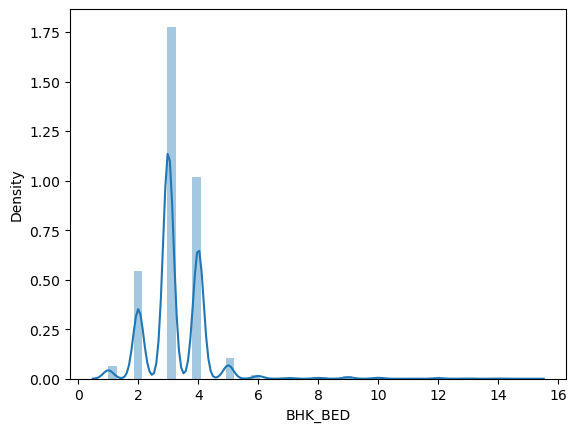

In [129]:
sns.distplot(df['BHK_BED'])

<Axes: xlabel='BHK_BED'>

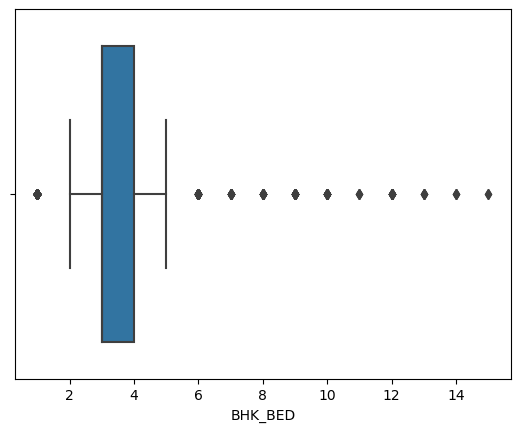

In [130]:
sns.boxplot(x=df['BHK_BED'])

In [131]:
df[df['BHK_BED']==102.0]

#5516

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM


In [132]:
df[df['BHK_BED']<15].shape

(9161, 34)

In [133]:
df['BHK_BED'].describe()

count    9163.000000
mean        3.245225
std         1.072873
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: BHK_BED, dtype: float64

In [134]:
df.shape

(9163, 34)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\4203811938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMENITIES_SCORE'])


<Axes: xlabel='AMENITIES_SCORE', ylabel='Density'>

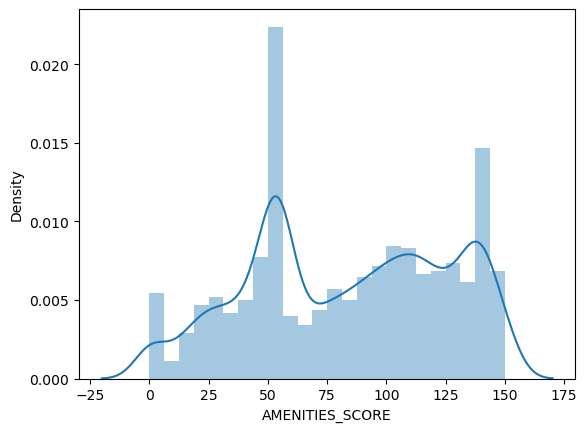

In [135]:

sns.distplot(df['AMENITIES_SCORE'])

<Axes: xlabel='AMENITIES_SCORE'>

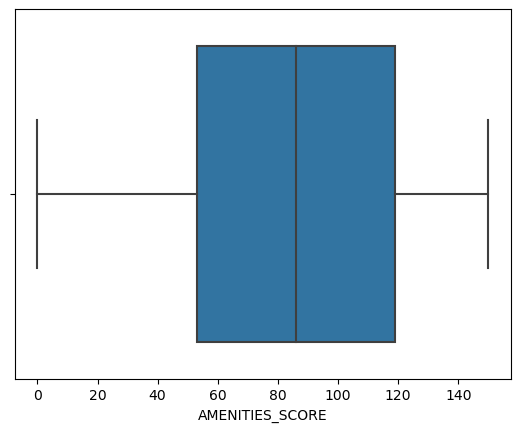

In [136]:
sns.boxplot(x=df['AMENITIES_SCORE'])

<Axes: xlabel='FLOOR_NUM'>

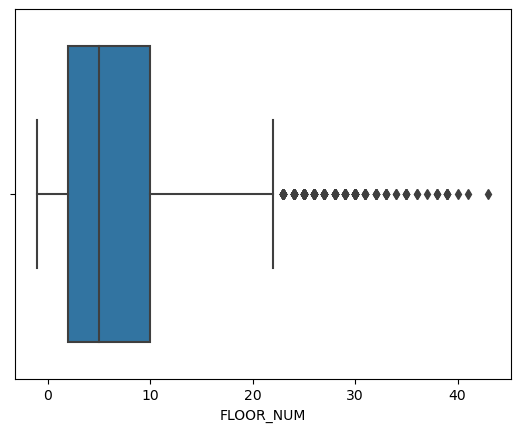

In [139]:
sns.boxplot(x=df['FLOOR_NUM'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8388\2027498616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['FLOOR_NUM'])


<Axes: ylabel='Density'>

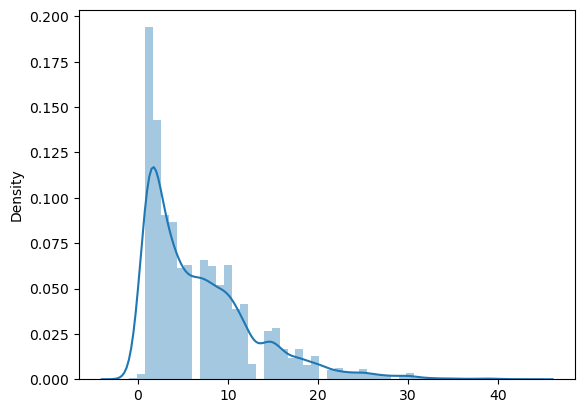

In [140]:
sns.distplot(x=df['FLOOR_NUM'])

In [142]:
df[df['FLOOR_NUM'] > 20].sort_values('FLOOR_NUM',ascending=False)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,FLOOR_NUM
9160,70601190,t70601190,gurgaon,53000000.0,9906.0,5350.0,13.0,4 bhk flat in gwal pahari,"at paras quarties gurgaon ,tower q is a remark...",residential apartment,Semifurnished,0,0-1 Year Old Property,high rise,4.0,paras quartier,3.0,28.437178,77.133522,4.0,gwal pahari,paras quartier,paras quartier,gurgoan,1,1,1,3,1,2,73,1,2,43.0
2386,70685962,o70685962,gurgaon,130000.0,53.0,2450.0,9.0,3 bhk flat in sector 65 gurgaon,m3m latitude is the most preferred destination...,residential apartment,Semifurnished,0,0-1 Year Old Property,high rise,3.0,m3m latitude,4.0,28.399827,77.061002,3.0,sector 65 gurgaon,m3m latitude,m3m latitude,3000,1,1,1,2,1,2,78,1,1,41.0
9162,71010870,u71010870,gurgaon,53000000.0,21818.0,2430.0,9.0,3 bhk flat in sector 65 gurgaon,2410 sqft higer floor available for sale m3m s...,residential apartment,Semifurnished,3,5-10 Year Old Property,high rise,3.0,m3m latitude,4.0,28.405670,77.070837,3.0,sector 65 gurgaon,m3m latitude,m3m latitude,NaN,1,1,1,2,1,2,124,1,3,40.0
9662,70658232,t70658232,gurgaon,71000000.0,14791.0,4800.0,7.0,5 bhk flat in sector 60 gurgaon,penthouse on 39th and 40th floor.\nsituated in...,residential apartment,Semifurnished,0,0-1 Year Old Property,high rise,5.0,ireo skyon,2.0,28.399880,77.096540,5.0,sector 60 gurgaon,ireo skyon,ireo skyon,NaN,1,1,1,1,1,1,138,1,3,39.0
9945,70734458,o70734458,gurgaon,98000000.0,13066.0,7500.0,10.0,5 bhk flat in sector 72 gurgaon,this lovely 5 bhk apartment/flat in sector 72 ...,residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,5.0,tata primanti,4.0,28.402309,77.036048,5.0,sector 72 gurgaon,tata primanti,tata primanti,NaN,1,1,1,2,1,2,150,1,3,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,70118836,r70118836,gurgaon,15200000.0,8941.0,1700.0,14.0,2 bhk flat in sector 104 gurgaon,looking for a 2 bhk property for sale in gurga...,residential apartment,Semifurnished,8,0-1 Year Old Property,high rise,2.0,puri emerald bay,3.0,28.482289,76.991786,2.0,sector 104 gurgaon,puri emerald bay,puri emerald bay,NaN,2,1,1,3,1,2,105,1,1,21.0
4560,68659752,l68659752,gurgaon,15500000.0,7771.0,1750.0,11.0,3 bhk flat in sector 109 gurgaon,"this 3 bhk flat is located in ats tourmaline, ...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,3.0,ats tourmaline,4.0,28.515309,77.003236,3.0,sector 109 gurgaon,ats tourmaline,ats tourmaline,NaN,1,1,1,2,1,1,137,1,3,21.0
8482,70210194,i70210194,gurgaon,41500000.0,16030.0,2588.0,11.0,3 bhk flat in sector 62 gurgaon,this beautiful 3 bhk flat in sector 62 gurgaon...,residential apartment,Semifurnished,5,1-5 Year Old Property,high rise,3.0,emaar digihomes,4.0,28.403560,77.085012,3.0,sector 62 gurgaon,emaar digihomes,emaar digihomes,aa2,1,2,1,4,1,1,127,1,3,21.0
9139,70594774,h70594774,gurgaon,52500000.0,9067.0,5790.0,10.0,5 bhk flat in sector 102 gurgaon,gymnasiumswimming poolkids' poolbadminton cour...,residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,5.0,adani m2k oyster grande,4.0,28.474697,76.968627,5.0,sector 102 gurgaon,adani m2k oyster grande,adani m2k oyster grande,NaN,1,1,1,2,1,1,112,1,1,21.0
